#  FOG TRAINING

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
import sys
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import math
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix
sb.set()

In [127]:
def getsize(model):
  p = pickle.dumps(model)
  return sys.getsizeof(p)

In [128]:
# Define custom function for specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

# Define a custom function that calculates the harmonic mean of sensitivity and specificity
def harmonic_mean(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Create a custom scorer
custom_scorer = make_scorer(harmonic_mean, greater_is_better=True)

In [130]:
patient_combo = '1_6_7_8_9'

# #1

In [131]:
time_1=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/time_1.csv")
freq_1=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-173.968750,-161,-191,67.749023,8.230979,174.163357,173.968750,0.0,30,...,-1.279370,96.494643,88.051405,8.557427,-0.872340,89.489531,136.257608,9.806951,-1.097899,138.768663
2,0,-175.250000,-151,-202,88.531250,9.409105,175.502404,175.250000,0.0,51,...,-0.865323,56.195788,63.713318,7.871782,-0.394283,63.921791,74.847254,9.314909,-0.680520,75.500136
3,0,-163.968750,-141,-181,89.624023,9.466997,164.241819,163.968750,0.0,40,...,5.093917,344.585264,65.109948,9.225050,-1.171882,66.581253,218.366460,9.725060,-0.927582,225.153998
4,0,-160.375000,-141,-191,118.359375,10.879309,160.743585,160.375000,0.0,50,...,13.650000,633.804876,64.618683,8.919283,-0.940924,63.942849,218.073292,8.902031,0.603874,216.260808
5,0,-180.484375,-161,-202,138.593506,11.772574,180.867916,180.484375,0.0,41,...,5.606094,491.672603,144.043261,9.642371,-1.334032,141.936111,265.252185,7.097721,1.180612,271.647464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,1,-161.828125,2707,-1888,309590.986084,556.409010,579.464691,309.390625,4.0,4595,...,1.661669,18973.757802,25410.346184,4.757743,1.460613,25499.657078,7871.863902,10.025579,-1.382934,8117.017419
4907,1,-168.312500,484,-1282,68776.621094,262.252972,311.617905,209.593750,2.0,1766,...,3.458455,7363.361565,4928.684117,5.780252,1.434548,4292.118885,2342.344435,6.092507,3.161030,2227.323341
4908,1,-147.828125,1424,-1252,116943.861084,341.970556,372.554715,238.296875,4.0,2676,...,8.505408,11965.230785,14384.521527,5.530174,2.511808,14531.015025,16339.458985,10.325112,-1.367546,16346.924920
4909,1,-196.437500,1868,-4767,581555.839844,762.598085,787.491925,402.281250,4.0,6635,...,2.062855,18784.944759,21677.068193,3.550188,2.848633,21731.262173,7381.908840,6.097441,2.017772,7135.649257


In [132]:
data_array = combined_1.to_numpy()
npy_file = r"train_data.npy"
np.save(npy_file, data_array)

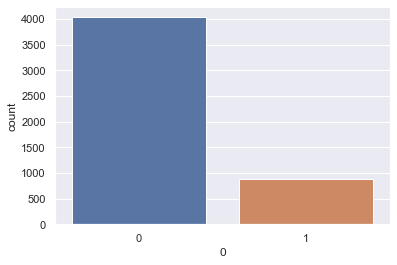

In [133]:
X = combined_1.drop('0', axis=1)
y = combined_1['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [134]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

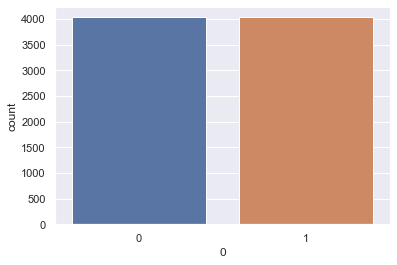

In [135]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [136]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# #2

In [34]:
time_2=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/time_2.csv")
freq_2=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/freq_2.csv")

combined_2 = pd.concat([time_2, freq_2], axis=1)
combined_2=combined_2[combined_2['0']!=2]
combined_2.dropna(inplace=True)
combined_2

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-169.609375,-141,-202,120.894287,10.995194,169.965392,169.609375,0.0,61,...,-0.900463,111.767049,161.836917,9.893908,-1.275890,79.734772,312.399633,9.941633,-1.302381,154.679852
2,0,-170.429688,-141,-202,229.573181,15.151673,171.101875,170.429688,0.0,61,...,15.853618,709.003011,195.339984,8.460016,-0.980346,97.760694,393.012029,9.625092,-0.828660,210.170566
3,0,-165.062500,-141,-191,91.308594,9.555553,165.338857,165.062500,0.0,50,...,-0.862159,82.929618,166.776192,9.312384,-1.218474,83.386972,567.951524,8.984902,-1.119204,284.516722
4,0,-180.390625,-141,-212,162.378662,12.742789,180.840140,180.390625,0.0,71,...,9.587612,404.576626,213.575717,9.033953,-0.860744,107.633370,287.667412,8.867006,-0.714751,142.630786
5,0,-181.375000,-151,-202,119.609375,10.936607,181.704430,181.375000,0.0,51,...,0.286478,153.031344,150.205595,9.807558,-1.413812,75.890504,307.340663,10.344588,-1.306082,155.261550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,1,-276.820312,222,-717,21032.319275,145.025237,312.508887,285.632812,3.0,939,...,13.164199,14294.577586,41357.361517,4.071940,8.234825,20055.143766,25004.217718,7.281656,2.078833,12553.160678
5597,1,-286.632812,828,-3242,127030.107361,356.412833,457.371268,319.523438,8.5,4070,...,8.674137,104260.315844,143756.742772,3.870695,5.585846,72639.202946,77233.101279,6.950476,2.057095,39133.710466
5598,1,-298.992188,151,-1070,47167.054626,217.179775,369.544832,308.882812,6.0,1221,...,15.202518,115462.786805,173679.080988,4.412705,4.114277,90121.057721,49066.291422,7.216291,2.104733,24627.451248
5599,1,-291.187500,1565,-2373,209704.839844,457.935410,542.673935,380.875000,11.0,3938,...,8.185869,144821.882545,305953.980016,5.737811,1.640699,157342.736183,128106.225279,8.225219,-0.240773,66019.154069


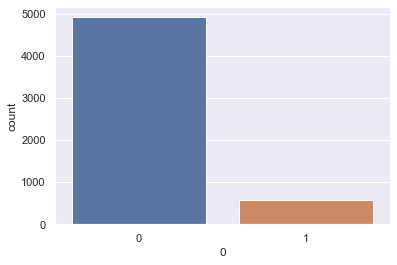

In [35]:
X = combined_2.drop('0', axis=1)
y = combined_2['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [36]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

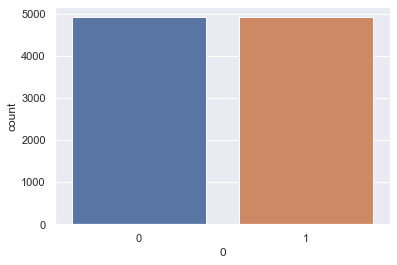

In [37]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [38]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# #3

In [195]:
time_3=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/time_3.csv")
freq_3=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/freq_3.csv")

combined_3 = pd.concat([time_3, freq_3], axis=1)
combined_3=combined_3[combined_3['0']!=2]
combined_3.dropna(inplace=True)
combined_3

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-168.276042,-141,-202,192.199843,13.863616,168.846161,168.276042,0.0,61,...,18.198913,825.876091,259.709800,9.357268,-1.180830,88.164395,640.628217,9.417840,-0.466981,209.804072
2,0,-170.322917,-141,-191,140.687391,11.861172,170.735419,170.322917,0.0,50,...,0.927603,170.731847,261.958070,9.455805,-1.016898,88.448302,703.621850,8.888386,-0.844602,241.516971
3,0,-180.895833,-141,-212,163.843316,12.800130,181.348134,180.895833,0.0,71,...,3.354739,299.084449,297.999131,9.755019,-1.413713,101.843896,768.613195,9.479480,-0.653214,262.818185
4,0,-187.890625,-171,-212,87.586995,9.358792,188.123560,187.890625,0.0,41,...,-1.186749,94.518719,256.661821,9.822965,-1.410471,84.484903,441.820537,10.001567,-1.267011,147.979389
5,0,-186.031250,-151,-222,173.259440,13.162805,186.496342,186.031250,0.0,71,...,12.063644,670.144669,408.843585,8.394497,-0.959191,135.585366,879.474751,8.919278,0.430239,289.385625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,1,-222.531250,2969,-5000,449771.686523,670.650197,706.605862,412.875000,25.0,7969,...,8.661797,102631.422751,284199.931398,4.244504,5.094838,94662.543910,95964.349873,7.779108,-0.359051,32690.187003
4831,1,-297.395833,2848,-5010,261045.530816,510.926150,591.176634,373.302083,9.0,7858,...,5.808450,18380.704059,90204.256001,4.917893,2.826141,28849.107288,51802.294632,7.515873,0.109789,17018.933476
4832,1,-291.015625,828,-3242,99329.057048,315.165127,428.974534,314.401042,12.0,4070,...,9.098382,90908.733241,201444.755838,4.449399,3.098254,66469.837643,111567.272394,7.772886,0.118787,37410.029223
4833,1,-293.526042,1565,-2373,156654.551405,395.796098,492.759666,358.453125,14.0,3938,...,7.951339,121081.119097,231028.670632,5.453192,3.090239,78420.249133,117436.406055,8.901905,-0.704345,40832.403359


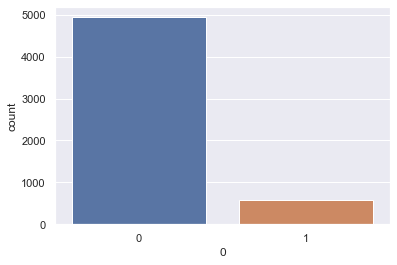

In [121]:
X = combined_1.drop('0', axis=1)
y = combined_1['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [122]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

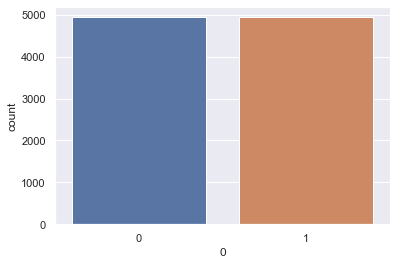

In [123]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [124]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# #4

In [138]:
time_4=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/time_4.csv")
freq_4=pd.read_csv(f"{patient_combo}/Labelled_Files_Train/features/freq_4.csv")

combined_4 = pd.concat([time_4, freq_4], axis=1)
combined_4=combined_4[combined_4['0']!=2]
combined_4.dropna(inplace=True)
combined_4

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-167.746094,-141,-202,167.642563,12.947686,168.245043,167.746094,0.0,61,...,8.154167,486.882627,518.521495,8.992888,-1.166730,129.135810,1551.550093,7.890592,0.805727,379.779406
2,0,-180.882812,-141,-212,141.236267,11.884287,181.272800,180.882812,0.0,71,...,10.740859,614.866956,448.470697,9.125781,-1.041832,110.906772,956.145325,9.075405,-0.590161,237.751488
3,0,-187.792969,-161,-212,100.140732,10.007034,188.059405,187.792969,0.0,51,...,0.749095,170.817012,402.214232,9.597146,-1.342644,100.355928,801.368638,9.865691,-0.831678,194.453697
4,0,-181.199219,-151,-222,156.409531,12.506380,181.630301,181.199219,0.0,71,...,3.629945,260.134342,523.962541,8.628585,-0.994547,132.205704,526.633925,8.494418,-0.797500,127.524377
5,0,-190.964844,-161,-222,117.697983,10.848870,191.272762,190.964844,0.0,61,...,9.184793,597.671327,704.488501,7.662351,-0.259232,176.730640,805.880455,8.983208,-0.798502,198.942018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,1,-193.593750,3282,-1797,127714.913086,357.372233,406.439975,279.992188,25.0,5079,...,7.910098,76240.122684,343022.995883,5.124908,4.682974,85044.257481,153588.222326,6.946199,0.920640,38422.296675
5528,1,-227.132812,969,-1818,89461.146423,299.100562,375.566853,282.570312,20.0,2787,...,7.497135,54844.494514,200643.050481,3.995398,5.866375,50139.112043,81880.942723,7.054895,1.880236,20129.281020
5529,1,-279.535156,2969,-5010,481271.397202,693.737268,747.938033,434.628906,22.0,7979,...,4.785854,56041.095126,287852.325793,6.026330,0.756506,72391.679168,172625.387186,8.633280,-0.876571,43483.145517
5530,1,-282.406250,828,-3242,81645.959961,285.737572,401.745255,304.351562,15.0,4070,...,8.818129,79025.472703,278223.308132,4.004582,6.055805,67394.821123,149686.380160,7.520659,0.921634,37620.307552


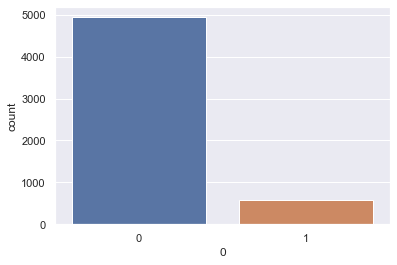

In [139]:
X = combined_1.drop('0', axis=1)
y = combined_1['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [140]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

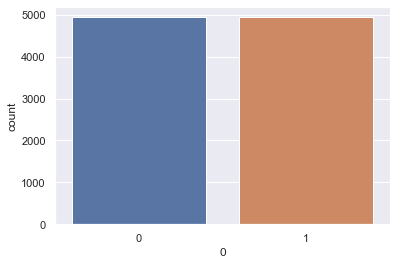

In [141]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [142]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# DecisionTree Classifier

In [137]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 25, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 99
max_resources_: 8072
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 90
n_resources: 99
Fitting 5 folds for each of 90 candidates, totalling 450 fits
----------
iter: 1
n_candidates: 30
n_resources: 297
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 2
n_candidates: 10
n_resources: 891
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 4
n_resources: 2673
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 8019
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best estimator found:  DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=5)


For Training Data:
Accuracy: 0.999380574826561
Precision: 1.0
Recall: 0.9987611496531219
F1-Score: 0.9993801909012024
Sensitivity: 0.9987611496531219
Specificity: 1.0


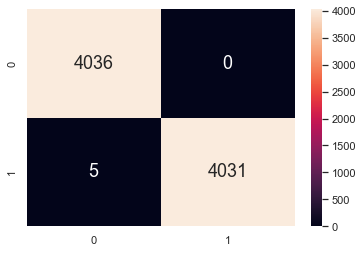

In [138]:
dt_y_pred = grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, dt_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, dt_y_pred))
print('Precision:', precision_score(y, dt_y_pred))
print('Recall:', recall_score(y, dt_y_pred))
print('F1-Score:', f1_score(y, dt_y_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

sb.heatmap(confusion_matrix(y, dt_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [139]:
getsize(grid_search)

57766

In [140]:
joblib.dump(grid_search, f"{patient_combo}/Models/dt_new_model_1.joblib")

['1_6_7_8_9/Models/dt_new_model_1.joblib']

# XGB

In [141]:
xgb = XGBClassifier(eval_metric='logloss')

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 12, 14, 16, 18, 20, 25, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.6, 0.8, 1],
#    'min_child_weight': [1, 5, 10],
#    'gamma': [0.5, 1, 1.5],
#    'reg_alpha': [0.1, 0.5, 1],
#    'reg_lambda': [0.1, 0.5, 1]
}

hgs = HalvingGridSearchCV(xgb, parameters, cv=5, scoring='f1', verbose=2, n_jobs=-1)

best_model = hgs.fit(X, y)

print('Best parameters:', best_model.best_params_)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 20
max_resources_: 8072
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 20
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_de

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total ti

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] EN

----------
iter: 2
n_candidates: 96
n_resources: 180
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 540
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 1620
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.7}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


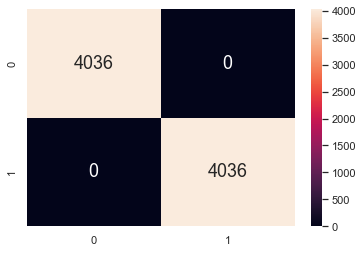

In [142]:
xgb_y_pred = best_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, xgb_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, xgb_y_pred))
print('Precision:', precision_score(y, xgb_y_pred))
print('Recall:', recall_score(y, xgb_y_pred))
print('F1-Score:', f1_score(y, xgb_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, xgb_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [143]:
getsize(best_model)

868971

In [144]:
joblib.dump(best_model, f"{patient_combo}/Models/xgb_new_model_1.joblib")

['1_6_7_8_9/Models/xgb_new_model_1.joblib']

# KNN

In [145]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

halving_grid_search = HalvingGridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, verbose=2, n_jobs=-1, scoring='f1')

# Fit the halving grid search model
halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 99
max_resources_: 8072
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 99
Fitting 3 folds for each of 120 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 40
n_resources: 297
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 14
n_resources: 891
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 3
n_candidates: 5
n_resources: 2673
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 8019
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best score found:  0.843750657715873


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


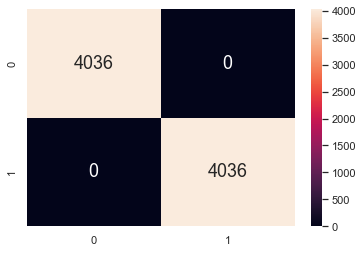

In [146]:
knn_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, knn_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, knn_y_pred))
print('Precision:', precision_score(y, knn_y_pred))
print('Recall:', recall_score(y, knn_y_pred))
print('F1-Score:', f1_score(y, knn_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, knn_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [147]:
getsize(halving_grid_search)

27410982

In [148]:
joblib.dump(halving_grid_search, f"{patient_combo}/Models/knn_new_model_1.joblib")

['1_6_7_8_9/Models/knn_new_model_1.joblib']

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=200, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=200, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=150, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=150, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=20, n_estimators=150, subsample=1; tot

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=100, subsampl

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=16, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=100, subsample=0.7;

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=16, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=18, n_estimators=50, subsample=0.7; 